## hw4

In [16]:
import nltk
from nltk.corpus import brown

#### 1. 写程序处理布朗语料库，找到以下问题的答案：
#### a. 哪些名词常以它们复数形式而不是它们的单数形式出现？（只考虑常规的复数形式，-s 后缀形式的）

In [17]:
brown_tagged=brown.tagged_words(tagset='universal')
nouns=[word for (word, tag) in brown_tagged if tag=='NOUN']
fdist=nltk.FreqDist(nouns)
for key in fdist.keys():
    if fdist[key]<fdist[key+'s']:
        print(key)

term
State
year
candidate
official
bond
item
fund
word
legislator
event
revision
requirement
fee
appointee
senator
Texan
Master
Extension
disclosure
minute
worker
employer
student
dollar
appropriation
thing
leader
rule
hour
element
step
affair
method
Lao
observer
complication
factor
vehicle
eye
revenue
expert
voter
member
product
remark
passenger
lip
commissioner
pledge
Representative
wave
visitor
scientist
object
locale
norm
Democrat
month
owner
American
banker
panel
Princes
commercial
native
headache
loyalist
towel
headline
acre
planner
bomb
critic
greeting
denomination
immigrant
defendant
Oriole
plate
error
hit
spectator
Ditmar
Yankee
Bird
wing
condition
win
allowance
knee
swelling
Longhorn
leg
Practice
yard
star
tactic
characteristic
arm
organ
Writer
Traveler
player
fan
arrangement
song
duffer
sport
creature
Change
Pirate
groove
Friend
Dodger
hitter
bubble
representative
Italian
nerve
movie
megaton
Angel
Cocktail
asset
Artist
sale
Dane
slipper
thug
Boy
mile
Work
resident
submarine


#### b. 哪个词的不同词性标记数目最多?

In [18]:
brown_tagged=brown.tagged_words(tagset='universal')
data=nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_tagged)
list=[(word, len(data[word])) for word in data.conditions()]
maxlen=max(len for (word, len) in list)
for (w, le) in list:
    if le==maxlen:
        print(w)

down


#### c. 按频率递减的顺序列出标记。前20 个最频繁的词性标记代表什么？

In [19]:
brown_tagged = brown.tagged_words()
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_tagged)
com_tag_fd=tag_fd.most_common()[:20]
com_tag_fd

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

In [20]:
for (tag,num) in com_tag_fd:
    nltk.help.brown_tagset(tag )

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
.: sentence terminator
    . ? ; ! :
,: comma
    ,
NNS: noun, plural, common
    irregularities presentments thanks reports voters laws legislators
    years areas adjustments chambers $100 bonds courts sales details raises
    sessions members congressmen votes polls calls ...
CC

#### d. 名词后面最常见的是哪些词性标记？这些标记代表什么？

In [22]:
brown_tagged = brown.tagged_words(tagset='universal')
word_tag_pairs = nltk.bigrams(brown_tagged)
noun_followers = [b[1] for (a, b) in word_tag_pairs if a[1] == 'NOUN']
fdist = nltk.FreqDist(noun_followers)
com_noun_followers=[tag for (tag, _) in fdist.most_common()]
com_noun_followers

['.',
 'ADP',
 'VERB',
 'NOUN',
 'CONJ',
 'ADV',
 'PRON',
 'PRT',
 'DET',
 'ADJ',
 'NUM',
 'X']

. - punctuation   
ADP - adpositions (prepositions and postpositions)   
VERB - verbs (all tenses and modes)   
NOUN - nouns (common and proper)   
CONJ - conjunctions   
ADV - adverbs   
PRON - pronouns   
PRT - particles or other function words   
DET - determiners   
ADJ - adjectives   
NUM - cardinal numbers   
X - other: foreign words, typos, abbreviations

#### 2. 绘制曲线显示查找标注器的性能随模型的大小增加的变化。绘制当训练数据量变化时unigram 标注器的性能曲线。

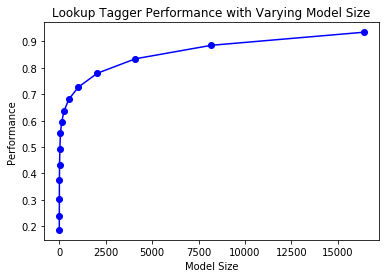

In [23]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()

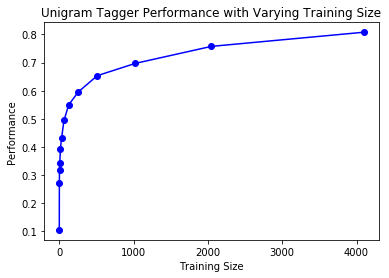

In [24]:
def performance(size):
    brown_tagged_sents = brown.tagged_sents(categories='news')
    train_sents = brown_tagged_sents[:size]
    test_sents = brown_tagged_sents[size:]  
    unigram_tagger = nltk.UnigramTagger(train_sents)
    return unigram_tagger.evaluate(test_sents)


def display():
    import pylab
    sizes = 2 ** pylab.arange(13)
    perfs = [performance(int(size)) for size in sizes]
    
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Unigram Tagger Performance with Varying Training Size')
    pylab.xlabel('Training Size')
    pylab.ylabel('Performance')
    pylab.show()   
    
display()